<a href="https://colab.research.google.com/github/Paduspan/CMS/blob/main/CMS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Data from Google Drive to Google Colab

In [1]:
import pandas as pd 
from google.colab import drive

drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!ls "/content/drive/My Drive/Data Science"

18zpallagi.csv	Prescriber_CodeBook.pdf  uszips.csv
18zpdoc.docx	Prescriber.csv


In [3]:
DataFrame=pd.read_csv("/content/drive/My Drive/Data Science/Prescriber.csv")

### Dataset

In [4]:
DataFrame.head()

,Unnamed: 0,npi,nppes_credentials,nppes_provider_gender,nppes_entity_code,nppes_provider_street1,nppes_provider_street2,nppes_provider_city,nppes_provider_zip5,nppes_provider_zip4,nppes_provider_state,nppes_provider_country,specialty_description,description_flag,medicare_prvdr_enroll_status,total_claim_count,total_30_day_fill_count,total_drug_cost,total_day_supply,bene_count,ge65_suppress_flag,total_claim_count_ge65,total_30_day_fill_count_ge65,total_drug_cost_ge65,total_day_supply_ge65,bene_count_ge65_suppress_flag,bene_count_ge65,brand_suppress_flag,brand_claim_count,brand_drug_cost,generic_suppress_flag,generic_claim_count,generic_drug_cost,other_suppress_flag,other_claim_count,other_drug_cost,mapd_suppress_flag,mapd_claim_count,mapd_drug_cost,pdp_suppress_flag,...,lis_suppress_flag,lis_claim_count,lis_drug_cost,nonlis_suppress_flag,nonlis_claim_count,nonlis_drug_cost,opioid_claim_count,opioid_drug_cost,opioid_day_supply,opioid_bene_count,opioid_prescriber_rate,la_opioid_claim_count,la_opioid_drug_cost,la_opioid_day_supply,la_opioid_bene_count,la_opioid_prescriber_rate,antibiotic_claim_count,antibiotic_drug_cost,antibiotic_bene_count,antipsych_ge65_suppress_flag,antipsych_claim_count_ge65,antipsych_drug_cost_ge65,antipsych_bene_ge65_suppress_flg,antipsych_bene_count_ge65,average_age_of_beneficiaries,beneficiary_age_less_65_count,beneficiary_age_65_74_count,beneficiary_age_75_84_count,beneficiary_age_greater_84_count,beneficiary_female_count,beneficiary_male_count,beneficiary_race_white_count,beneficiary_race_black_count,beneficiary_race_asian_pi_count,beneficiary_race_hispanic_count,beneficiary_race_nat_ind_count,beneficiary_race_other_count,beneficiary_nondual_count,beneficiary_dual_count,beneficiary_average_risk_score
0,0,1003000126,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,21502.0,1854.0,MD,US,Internal Medicine,S,E,675,700.3,34683.66,15068,238.0,NaN,517.0,539.9,26897.15,11881.0,NaN,183.0,NaN,124.0,25445.55,NaN,538.0,8972.37,NaN,13.0,265.74,NaN,55.0,3960.66,NaN,...,NaN,351.0,15295.86,NaN,324.0,19387.80,37.0,762.08,291.0,29.0,5.48,NaN,NaN,NaN,NaN,NaN,134.0,8050.71,114.0,*,NaN,NaN,*,NaN,71.0,55.0,84.0,68.0,31.0,134.0,104.0,227.0,NaN,NaN,NaN,0.0,NaN,144.0,94.0,2.0266
1,1,1003000142,M.D.,M,I,4126 N HOLLAND SYLVANIA RD,SUITE 220,TOLEDO,43623.0,3536.0,OH,US,Anesthesiology,S,E,937,973.6,51586.70,27520,146.0,NaN,346.0,363.7,20778.74,10265.0,NaN,61.0,NaN,116.0,31794.97,NaN,821.0,19791.73,NaN,0.0,0.00,NaN,249.0,10542.82,NaN,...,NaN,628.0,33275.89,NaN,309.0,18310.81,425.0,11469.70,11770.0,90.0,45.36,36.0,2534.43,979.0,NaN,8.47,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,61.0,85.0,41.0,NaN,NaN,81.0,65.0,95.0,NaN,0.0,NaN,0.0,NaN,64.0,82.0,1.6538
2,2,1003000159,FNP,F,I,4115 DORCHESTER ROAD,CONCENTRA MEDICAL CENTER,CHARLESTON,29405.0,NaN,SC,US,Nurse Practitioner,S,E,18,18.0,150.02,421,NaN,#,NaN,NaN,NaN,NaN,#,NaN,*,NaN,NaN,#,NaN,NaN,NaN,0.0,0.00,#,NaN,NaN,*,...,*,NaN,NaN,#,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.0,0.0,0.00,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1003000167,DDS,M,I,5 PINE CONE RD,NaN,DAYTON,89403.0,7482.0,NV,US,Dentist,T,N,58,58.7,395.17,693,26.0,NaN,37.0,37.7,259.72,571.0,#,NaN,NaN,0.0,0.00,NaN,41.0,261.49,NaN,17.0,133.68,NaN,20.0,103.08,NaN,...,NaN,14.0,78.46,NaN,44.0,316.71,18.0,80.40,39.0,11.0,31.03,0.0,0.00,0.0,0.0,0.00,19.0,114.38,16.0,NaN,0.0,0.0,NaN,0.0,67.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,1.3362
4,4,1003000282,FNP,F,I,TENNESSEE PRISON FOR WOMEN,3881 STEWARTS LANE,NASHVILLE,37243.0,1.0,TN,US,Nurse Practitioner,S,N,14,14.0,135.93,420,NaN,#,NaN,NaN,NaN,NaN,#,NaN,NaN,0.0,0.00,NaN,14.0,135.93,NaN,0.0,0.00,NaN,0.0,0.00,NaN,...,#,NaN,NaN,*,NaN,NaN,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0,NaN,0.0,0.00,0.0,NaN,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
DataFrame.columns

Index(['Unnamed: 0', 'npi', 'nppes_credentials', 'nppes_provider_gender',
       'nppes_entity_code', 'nppes_provider_street1', 'nppes_provider_street2',
       'nppes_provider_city', 'nppes_provider_zip5', 'nppes_provider_zip4',
       'nppes_provider_state', 'nppes_provider_country',
       'specialty_description', 'description_flag',
       'medicare_prvdr_enroll_status', 'total_claim_count',
       'total_30_day_fill_count', 'total_drug_cost', 'total_day_supply',
       'bene_count', 'ge65_suppress_flag', 'total_claim_count_ge65',
       'total_30_day_fill_count_ge65', 'total_drug_cost_ge65',
       'total_day_supply_ge65', 'bene_count_ge65_suppress_flag',
       'bene_count_ge65', 'brand_suppress_flag', 'brand_claim_count',
       'brand_drug_cost', 'generic_suppress_flag', 'generic_claim_count',
       'generic_drug_cost', 'other_suppress_flag', 'other_claim_count',
       'other_drug_cost', 'mapd_suppress_flag', 'mapd_claim_count',
       'mapd_drug_cost', 'pdp_suppress_flag', '

In [6]:
# #drop Unnamed column
DataFrame.drop(['Unnamed: 0'],axis=1,inplace=True)
columns=DataFrame.columns

In [7]:
#Example before preprocessing
DataFrame.loc[:,'generic_suppress_flag'].head(20)

0     NaN
1     NaN
2       #
3     NaN
4     NaN
5     NaN
6     NaN
7     NaN
8     NaN
9     NaN
10      #
11    NaN
12    NaN
13    NaN
14    NaN
15    NaN
16      #
17      #
18    NaN
19    NaN
Name: generic_suppress_flag, dtype: object

### Data Shape before preprocessing

In [8]:
DataFrame.shape

(1014675, 81)

In [9]:
DataFrame.dtypes

npi                                 int64
nppes_credentials                  object
nppes_provider_gender              object
nppes_entity_code                  object
nppes_provider_street1             object
                                   ...   
beneficiary_race_nat_ind_count    float64
beneficiary_race_other_count      float64
beneficiary_nondual_count         float64
beneficiary_dual_count            float64
beneficiary_average_risk_score    float64
Length: 81, dtype: object

In [10]:
DataFrame.isnull().sum().sum()

25878182

In [11]:
x = DataFrame.columns.to_series().groupby(DataFrame.dtypes).groups
print(x)
print('-----------------------------------------------------------------------')
# DataFrame.columns.to_series().groupby(DataFrame.dtypes).sum()
DataFrame_numerical = DataFrame.select_dtypes(exclude='object')
DataFrame_categorical= DataFrame.select_dtypes(include='object')

print('DataFrame_numerical: \n ',DataFrame_numerical.shape,'\n', DataFrame_numerical.columns)
print('-----------------------------------------------------------------------')
print('DataFrame_categorical: \n',DataFrame_categorical.shape,'\n', DataFrame_categorical.columns)

{int64: ['npi', 'total_claim_count', 'total_day_supply'], float64: ['nppes_provider_zip5', 'nppes_provider_zip4', 'total_30_day_fill_count', 'total_drug_cost', 'bene_count', 'total_claim_count_ge65', 'total_30_day_fill_count_ge65', 'total_drug_cost_ge65', 'total_day_supply_ge65', 'bene_count_ge65', 'brand_claim_count', 'brand_drug_cost', 'generic_claim_count', 'generic_drug_cost', 'other_claim_count', 'other_drug_cost', 'mapd_claim_count', 'mapd_drug_cost', 'pdp_claim_count', 'pdp_drug_cost', 'lis_claim_count', 'lis_drug_cost', 'nonlis_claim_count', 'nonlis_drug_cost', 'opioid_claim_count', 'opioid_drug_cost', 'opioid_day_supply', 'opioid_bene_count', 'opioid_prescriber_rate', 'la_opioid_claim_count', 'la_opioid_drug_cost', 'la_opioid_day_supply', 'la_opioid_bene_count', 'la_opioid_prescriber_rate', 'antibiotic_claim_count', 'antibiotic_drug_cost', 'antibiotic_bene_count', 'antipsych_claim_count_ge65', 'antipsych_drug_cost_ge65', 'antipsych_bene_count_ge65', 'average_age_of_beneficiari

In [12]:
DataFrame_numerical.head(3)

,npi,nppes_provider_zip5,nppes_provider_zip4,total_claim_count,total_30_day_fill_count,total_drug_cost,total_day_supply,bene_count,total_claim_count_ge65,total_30_day_fill_count_ge65,total_drug_cost_ge65,total_day_supply_ge65,bene_count_ge65,brand_claim_count,brand_drug_cost,generic_claim_count,generic_drug_cost,other_claim_count,other_drug_cost,mapd_claim_count,mapd_drug_cost,pdp_claim_count,pdp_drug_cost,lis_claim_count,lis_drug_cost,nonlis_claim_count,nonlis_drug_cost,opioid_claim_count,opioid_drug_cost,opioid_day_supply,opioid_bene_count,opioid_prescriber_rate,la_opioid_claim_count,la_opioid_drug_cost,la_opioid_day_supply,la_opioid_bene_count,la_opioid_prescriber_rate,antibiotic_claim_count,antibiotic_drug_cost,antibiotic_bene_count,antipsych_claim_count_ge65,antipsych_drug_cost_ge65,antipsych_bene_count_ge65,average_age_of_beneficiaries,beneficiary_age_less_65_count,beneficiary_age_65_74_count,beneficiary_age_75_84_count,beneficiary_age_greater_84_count,beneficiary_female_count,beneficiary_male_count,beneficiary_race_white_count,beneficiary_race_black_count,beneficiary_race_asian_pi_count,beneficiary_race_hispanic_count,beneficiary_race_nat_ind_count,beneficiary_race_other_count,beneficiary_nondual_count,beneficiary_dual_count,beneficiary_average_risk_score
0,1003000126,21502.0,1854.0,675,700.3,34683.66,15068,238.0,517.0,539.9,26897.15,11881.0,183.0,124.0,25445.55,538.0,8972.37,13.0,265.74,55.0,3960.66,620.0,30723.00,351.0,15295.86,324.0,19387.80,37.0,762.08,291.0,29.0,5.48,NaN,NaN,NaN,NaN,NaN,134.0,8050.71,114.0,NaN,NaN,NaN,71.0,55.0,84.0,68.0,31.0,134.0,104.0,227.0,NaN,NaN,NaN,0.0,NaN,144.0,94.0,2.0266
1,1003000142,43623.0,3536.0,937,973.6,51586.70,27520,146.0,346.0,363.7,20778.74,10265.0,61.0,116.0,31794.97,821.0,19791.73,0.0,0.00,249.0,10542.82,688.0,41043.88,628.0,33275.89,309.0,18310.81,425.0,11469.70,11770.0,90.0,45.36,36.0,2534.43,979.0,NaN,8.47,NaN,NaN,NaN,0.0,0.0,0.0,61.0,85.0,41.0,NaN,NaN,81.0,65.0,95.0,NaN,0.0,NaN,0.0,NaN,64.0,82.0,1.6538
2,1003000159,29405.0,NaN,18,18.0,150.02,421,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.0,0.0,0.00,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
#Numerical variables
print('Count null \nDataFrame_numerical: \n \n',DataFrame_numerical.isnull().sum())

Count null 
DataFrame_numerical: 
 
 npi                                      0
nppes_provider_zip5                      1
nppes_provider_zip4                 113855
total_claim_count                        0
total_30_day_fill_count                  0
total_drug_cost                          0
total_day_supply                         0
bene_count                          126869
total_claim_count_ge65              220223
total_30_day_fill_count_ge65        220223
total_drug_cost_ge65                220223
total_day_supply_ge65               220223
bene_count_ge65                     447790
brand_claim_count                   446012
brand_drug_cost                     446012
generic_claim_count                 274021
generic_drug_cost                   274021
other_claim_count                   267286
other_drug_cost                     267286
mapd_claim_count                    216580
mapd_drug_cost                      216580
pdp_claim_count                     216580
pdp_drug_cost    

In [14]:
#Categorical variables
print('Count null \nDataFrame_categorical: \n \n',DataFrame_categorical.isnull().sum())

Count null 
DataFrame_categorical: 
 
 nppes_credentials                    41749
nppes_provider_gender                   22
nppes_entity_code                        0
nppes_provider_street1                   0
nppes_provider_street2              603961
nppes_provider_city                      0
nppes_provider_state                     0
nppes_provider_country                   0
specialty_description                    0
description_flag                         0
medicare_prvdr_enroll_status             0
ge65_suppress_flag                  794452
bene_count_ge65_suppress_flag       566885
brand_suppress_flag                 568663
generic_suppress_flag               740654
other_suppress_flag                 747389
mapd_suppress_flag                  798095
pdp_suppress_flag                   798095
lis_suppress_flag                   800266
nonlis_suppress_flag                800266
antipsych_ge65_suppress_flag        882284
antipsych_bene_ge65_suppress_flg    800442
dtype: int64


## K^2 Normality Test
### If an index is normally distributed we use MEAN for handling missing values, else MEDIAN. we use MODE for Object types.

In [15]:
   from scipy.stats import normaltest
j=0
for i in DataFrame_numerical:
  j+=1
  # print(j)
# The D'Agostino's K^2 Normality Test

  # G=[]
  # NG=[]
  stat, p = normaltest(DataFrame_numerical.iloc[:, j-1])
  # print('stat=%.3f, p=%.3f' % (stat, p))
  if p > 0.05:
      # print(i)
      print('Gaussian:',[j, i])
  
  else:
      # print(i)
      print('Not Gaussian:', [j, i])

Not Gaussian: [1, 'npi']
Not Gaussian: [2, 'nppes_provider_zip5']
Not Gaussian: [3, 'nppes_provider_zip4']
Not Gaussian: [4, 'total_claim_count']
Not Gaussian: [5, 'total_30_day_fill_count']
Not Gaussian: [6, 'total_drug_cost']
Not Gaussian: [7, 'total_day_supply']
Not Gaussian: [8, 'bene_count']
Not Gaussian: [9, 'total_claim_count_ge65']
Not Gaussian: [10, 'total_30_day_fill_count_ge65']
Not Gaussian: [11, 'total_drug_cost_ge65']
Not Gaussian: [12, 'total_day_supply_ge65']
Not Gaussian: [13, 'bene_count_ge65']
Not Gaussian: [14, 'brand_claim_count']
Not Gaussian: [15, 'brand_drug_cost']
Not Gaussian: [16, 'generic_claim_count']
Not Gaussian: [17, 'generic_drug_cost']
Not Gaussian: [18, 'other_claim_count']
Not Gaussian: [19, 'other_drug_cost']
Not Gaussian: [20, 'mapd_claim_count']
Not Gaussian: [21, 'mapd_drug_cost']
Not Gaussian: [22, 'pdp_claim_count']
Not Gaussian: [23, 'pdp_drug_cost']
Not Gaussian: [24, 'lis_claim_count']
Not Gaussian: [25, 'lis_drug_cost']
Not Gaussian: [26, '

### Estimate Mean and Median at "nppes_provider_zip5", as an example

In [16]:
print(' "nppes_provider_zip5" \nMean:  ',DataFrame_numerical.iloc[:, 1].mean())
print('Median:  ',DataFrame_numerical.iloc[:, 1].median())
# print('Mode:  ',DataFrame_numerical.iloc[:, 1].mode())

 "nppes_provider_zip5" 
Mean:   48079.889316174456
Median:   45154.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


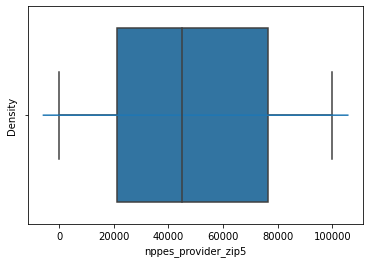

In [17]:
import seaborn as sns
# Box plot
sns.boxplot(DataFrame_numerical.iloc[:, 1])
# Distribution plot
sns.distplot(DataFrame_numerical.iloc[:, 1])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


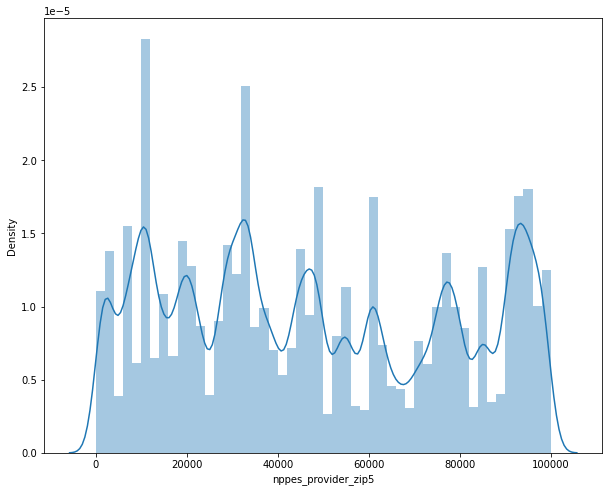

In [18]:
import matplotlib.pyplot as plt
fig, ax= plt.subplots(figsize=(10,8))
sns.distplot(DataFrame_numerical.iloc[:, 1])

### Estimate Mean and Median at "total_drug_cost", as an example

In [19]:
print(' "total_drug_cost" \nMean:  ',DataFrame_numerical.iloc[:, 5].mean())
print('Median:  ',DataFrame_numerical.iloc[:, 5].median())
# print('Mode:  ',DataFrame_numerical.iloc[:, 5].mode())

 "total_drug_cost" 
Mean:   114807.66353309363
Median:   9881.13


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


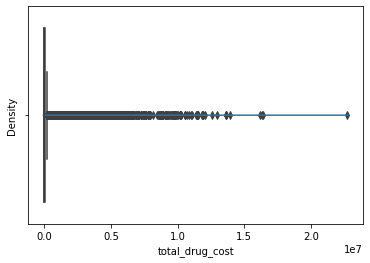

In [20]:
import seaborn as sns
# Box plot
sns.boxplot(DataFrame_numerical.iloc[:, 5])
# Distribution plot
sns.distplot(DataFrame_numerical.iloc[:, 5])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


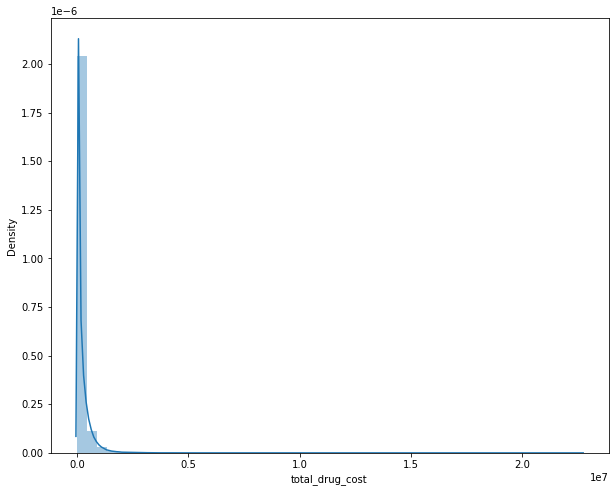

In [21]:
import matplotlib.pyplot as plt
fig, ax= plt.subplots(figsize=(10,8))
sns.distplot(DataFrame_numerical.iloc[:, 5])

### Replacing Median and Mode for missing values

In [22]:
import numpy as np 
DataFrame.replace([' ','?', '#', '*'], np.nan, inplace=True)

#Function takes in the name of dataset.

def errorReplacer(data):
    df = data
    x = pd.DataFrame(df.isnull().sum())
    x = x[x[0] > 0]

    for i in x.index:
        if df[i].dtypes == 'float64':
            median = df[i].median()
            df[i].replace(np.nan, median, inplace = True)
            if df[i].dtypes == 'int64':
                df[i] = df[i].astype(int)
            elif df[i].dtypes == 'float64':
                pass
        elif df[i].dtypes == 'object':
            mode = df[i].mode()
            df[i] = df[i].replace({np.nan : mode.values})


errorReplacer(DataFrame)
print(DataFrame.head())


          npi  ... beneficiary_average_risk_score
0  1003000126  ...                         2.0266
1  1003000142  ...                         1.6538
2  1003000159  ...                         1.2276
3  1003000167  ...                         1.3362
4  1003000282  ...                         1.2276

[5 rows x 81 columns]


### Remained Null values

In [23]:
DataFrame.isnull().sum().sum()

11161425

In [24]:
DataFrame.head(3)

,npi,nppes_credentials,nppes_provider_gender,nppes_entity_code,nppes_provider_street1,nppes_provider_street2,nppes_provider_city,nppes_provider_zip5,nppes_provider_zip4,nppes_provider_state,nppes_provider_country,specialty_description,description_flag,medicare_prvdr_enroll_status,total_claim_count,total_30_day_fill_count,total_drug_cost,total_day_supply,bene_count,ge65_suppress_flag,total_claim_count_ge65,total_30_day_fill_count_ge65,total_drug_cost_ge65,total_day_supply_ge65,bene_count_ge65_suppress_flag,bene_count_ge65,brand_suppress_flag,brand_claim_count,brand_drug_cost,generic_suppress_flag,generic_claim_count,generic_drug_cost,other_suppress_flag,other_claim_count,other_drug_cost,mapd_suppress_flag,mapd_claim_count,mapd_drug_cost,pdp_suppress_flag,pdp_claim_count,...,lis_suppress_flag,lis_claim_count,lis_drug_cost,nonlis_suppress_flag,nonlis_claim_count,nonlis_drug_cost,opioid_claim_count,opioid_drug_cost,opioid_day_supply,opioid_bene_count,opioid_prescriber_rate,la_opioid_claim_count,la_opioid_drug_cost,la_opioid_day_supply,la_opioid_bene_count,la_opioid_prescriber_rate,antibiotic_claim_count,antibiotic_drug_cost,antibiotic_bene_count,antipsych_ge65_suppress_flag,antipsych_claim_count_ge65,antipsych_drug_cost_ge65,antipsych_bene_ge65_suppress_flg,antipsych_bene_count_ge65,average_age_of_beneficiaries,beneficiary_age_less_65_count,beneficiary_age_65_74_count,beneficiary_age_75_84_count,beneficiary_age_greater_84_count,beneficiary_female_count,beneficiary_male_count,beneficiary_race_white_count,beneficiary_race_black_count,beneficiary_race_asian_pi_count,beneficiary_race_hispanic_count,beneficiary_race_nat_ind_count,beneficiary_race_other_count,beneficiary_nondual_count,beneficiary_dual_count,beneficiary_average_risk_score
0,1003000126,M.D.,M,I,900 SETON DR,SUITE 100,CUMBERLAND,21502.0,1854.0,MD,US,Internal Medicine,S,E,675,700.3,34683.66,15068,238.0,NaN,517.0,539.9,26897.150,11881.0,NaN,183.0,NaN,124.0,25445.55,NaN,538.0,8972.370,NaN,13.0,265.74,NaN,55.0,3960.66,NaN,620.0,...,NaN,351.0,15295.86,NaN,324.0,19387.800,37.0,762.08,291.0,29.0,5.48,0.0,0.00,0.0,0.0,0.00,134.0,8050.71,114.0,NaN,0.0,0.0,NaN,0.0,71.0,55.0,84.0,68.0,31.0,134.0,104.0,227.0,0.0,0.0,0.0,0.0,0.0,144.0,94.0,2.0266
1,1003000142,M.D.,M,I,4126 N HOLLAND SYLVANIA RD,SUITE 220,TOLEDO,43623.0,3536.0,OH,US,Anesthesiology,S,E,937,973.6,51586.70,27520,146.0,NaN,346.0,363.7,20778.740,10265.0,NaN,61.0,NaN,116.0,31794.97,NaN,821.0,19791.730,NaN,0.0,0.00,NaN,249.0,10542.82,NaN,688.0,...,NaN,628.0,33275.89,NaN,309.0,18310.810,425.0,11469.70,11770.0,90.0,45.36,36.0,2534.43,979.0,0.0,8.47,33.0,480.12,27.0,NaN,0.0,0.0,NaN,0.0,61.0,85.0,41.0,66.0,25.0,81.0,65.0,95.0,0.0,0.0,0.0,0.0,0.0,64.0,82.0,1.6538
2,1003000159,FNP,F,I,4115 DORCHESTER ROAD,CONCENTRA MEDICAL CENTER,CHARLESTON,29405.0,3333.0,SC,US,Nurse Practitioner,S,E,18,18.0,150.02,421,82.0,NaN,230.0,278.8,13305.705,6367.0,NaN,102.0,NaN,71.0,17913.89,NaN,316.0,7949.895,NaN,0.0,0.00,NaN,89.0,4578.96,NaN,208.0,...,NaN,126.0,7813.95,NaN,165.0,8520.975,24.0,269.56,185.0,18.0,4.07,0.0,0.00,0.0,0.0,0.00,33.0,480.12,27.0,NaN,0.0,0.0,NaN,0.0,70.0,31.0,73.0,66.0,25.0,73.0,46.0,110.0,0.0,0.0,0.0,0.0,0.0,85.0,40.0,1.2276


In [25]:
##Example after preprocessing
DataFrame.loc[:,'generic_suppress_flag'].head(20)

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
Name: generic_suppress_flag, dtype: float64

### Identifying Columns contain NAN

In [26]:
NAN=DataFrame.columns[DataFrame.isna().any()].tolist()
print(NAN)

['ge65_suppress_flag', 'bene_count_ge65_suppress_flag', 'brand_suppress_flag', 'generic_suppress_flag', 'other_suppress_flag', 'mapd_suppress_flag', 'pdp_suppress_flag', 'lis_suppress_flag', 'nonlis_suppress_flag', 'antipsych_ge65_suppress_flag', 'antipsych_bene_ge65_suppress_flg']


In [27]:
DataFrame.head(3)

,npi,nppes_credentials,nppes_provider_gender,nppes_entity_code,nppes_provider_street1,nppes_provider_street2,nppes_provider_city,nppes_provider_zip5,nppes_provider_zip4,nppes_provider_state,nppes_provider_country,specialty_description,description_flag,medicare_prvdr_enroll_status,total_claim_count,total_30_day_fill_count,total_drug_cost,total_day_supply,bene_count,ge65_suppress_flag,total_claim_count_ge65,total_30_day_fill_count_ge65,total_drug_cost_ge65,total_day_supply_ge65,bene_count_ge65_suppress_flag,bene_count_ge65,brand_suppress_flag,brand_claim_count,brand_drug_cost,generic_suppress_flag,generic_claim_count,generic_drug_cost,other_suppress_flag,other_claim_count,other_drug_cost,mapd_suppress_flag,mapd_claim_count,mapd_drug_cost,pdp_suppress_flag,pdp_claim_count,...,lis_suppress_flag,lis_claim_count,lis_drug_cost,nonlis_suppress_flag,nonlis_claim_count,nonlis_drug_cost,opioid_claim_count,opioid_drug_cost,opioid_day_supply,opioid_bene_count,opioid_prescriber_rate,la_opioid_claim_count,la_opioid_drug_cost,la_opioid_day_supply,la_opioid_bene_count,la_opioid_prescriber_rate,antibiotic_claim_count,antibiotic_drug_cost,antibiotic_bene_count,antipsych_ge65_suppress_flag,antipsych_claim_count_ge65,antipsych_drug_cost_ge65,antipsych_bene_ge65_suppress_flg,antipsych_bene_count_ge65,average_age_of_beneficiaries,beneficiary_age_less_65_count,beneficiary_age_65_74_count,beneficiary_age_75_84_count,beneficiary_age_greater_84_count,beneficiary_female_count,beneficiary_male_count,beneficiary_race_white_count,beneficiary_race_black_count,beneficiary_race_asian_pi_count,beneficiary_race_hispanic_count,beneficiary_race_nat_ind_count,beneficiary_race_other_count,beneficiary_nondual_count,beneficiary_dual_count,beneficiary_average_risk_score
0,1003000126,M.D.,M,I,900 SETON DR,SUITE 100,CUMBERLAND,21502.0,1854.0,MD,US,Internal Medicine,S,E,675,700.3,34683.66,15068,238.0,NaN,517.0,539.9,26897.150,11881.0,NaN,183.0,NaN,124.0,25445.55,NaN,538.0,8972.370,NaN,13.0,265.74,NaN,55.0,3960.66,NaN,620.0,...,NaN,351.0,15295.86,NaN,324.0,19387.800,37.0,762.08,291.0,29.0,5.48,0.0,0.00,0.0,0.0,0.00,134.0,8050.71,114.0,NaN,0.0,0.0,NaN,0.0,71.0,55.0,84.0,68.0,31.0,134.0,104.0,227.0,0.0,0.0,0.0,0.0,0.0,144.0,94.0,2.0266
1,1003000142,M.D.,M,I,4126 N HOLLAND SYLVANIA RD,SUITE 220,TOLEDO,43623.0,3536.0,OH,US,Anesthesiology,S,E,937,973.6,51586.70,27520,146.0,NaN,346.0,363.7,20778.740,10265.0,NaN,61.0,NaN,116.0,31794.97,NaN,821.0,19791.730,NaN,0.0,0.00,NaN,249.0,10542.82,NaN,688.0,...,NaN,628.0,33275.89,NaN,309.0,18310.810,425.0,11469.70,11770.0,90.0,45.36,36.0,2534.43,979.0,0.0,8.47,33.0,480.12,27.0,NaN,0.0,0.0,NaN,0.0,61.0,85.0,41.0,66.0,25.0,81.0,65.0,95.0,0.0,0.0,0.0,0.0,0.0,64.0,82.0,1.6538
2,1003000159,FNP,F,I,4115 DORCHESTER ROAD,CONCENTRA MEDICAL CENTER,CHARLESTON,29405.0,3333.0,SC,US,Nurse Practitioner,S,E,18,18.0,150.02,421,82.0,NaN,230.0,278.8,13305.705,6367.0,NaN,102.0,NaN,71.0,17913.89,NaN,316.0,7949.895,NaN,0.0,0.00,NaN,89.0,4578.96,NaN,208.0,...,NaN,126.0,7813.95,NaN,165.0,8520.975,24.0,269.56,185.0,18.0,4.07,0.0,0.00,0.0,0.0,0.00,33.0,480.12,27.0,NaN,0.0,0.0,NaN,0.0,70.0,31.0,73.0,66.0,25.0,73.0,46.0,110.0,0.0,0.0,0.0,0.0,0.0,85.0,40.0,1.2276


In [28]:
#drop columns which have NAN in all rows
DataFrame.drop(NAN,axis=1,inplace=True)
columns=DataFrame.columns

### Pure Dataset

In [29]:
DataFrame.head(3)

,npi,nppes_credentials,nppes_provider_gender,nppes_entity_code,nppes_provider_street1,nppes_provider_street2,nppes_provider_city,nppes_provider_zip5,nppes_provider_zip4,nppes_provider_state,nppes_provider_country,specialty_description,description_flag,medicare_prvdr_enroll_status,total_claim_count,total_30_day_fill_count,total_drug_cost,total_day_supply,bene_count,total_claim_count_ge65,total_30_day_fill_count_ge65,total_drug_cost_ge65,total_day_supply_ge65,bene_count_ge65,brand_claim_count,brand_drug_cost,generic_claim_count,generic_drug_cost,other_claim_count,other_drug_cost,mapd_claim_count,mapd_drug_cost,pdp_claim_count,pdp_drug_cost,lis_claim_count,lis_drug_cost,nonlis_claim_count,nonlis_drug_cost,opioid_claim_count,opioid_drug_cost,opioid_day_supply,opioid_bene_count,opioid_prescriber_rate,la_opioid_claim_count,la_opioid_drug_cost,la_opioid_day_supply,la_opioid_bene_count,la_opioid_prescriber_rate,antibiotic_claim_count,antibiotic_drug_cost,antibiotic_bene_count,antipsych_claim_count_ge65,antipsych_drug_cost_ge65,antipsych_bene_count_ge65,average_age_of_beneficiaries,beneficiary_age_less_65_count,beneficiary_age_65_74_count,beneficiary_age_75_84_count,beneficiary_age_greater_84_count,beneficiary_female_count,beneficiary_male_count,beneficiary_race_white_count,beneficiary_race_black_count,beneficiary_race_asian_pi_count,beneficiary_race_hispanic_count,beneficiary_race_nat_ind_count,beneficiary_race_other_count,beneficiary_nondual_count,beneficiary_dual_count,beneficiary_average_risk_score
0,1003000126,M.D.,M,I,900 SETON DR,SUITE 100,CUMBERLAND,21502.0,1854.0,MD,US,Internal Medicine,S,E,675,700.3,34683.66,15068,238.0,517.0,539.9,26897.150,11881.0,183.0,124.0,25445.55,538.0,8972.370,13.0,265.74,55.0,3960.66,620.0,30723.00,351.0,15295.86,324.0,19387.800,37.0,762.08,291.0,29.0,5.48,0.0,0.00,0.0,0.0,0.00,134.0,8050.71,114.0,0.0,0.0,0.0,71.0,55.0,84.0,68.0,31.0,134.0,104.0,227.0,0.0,0.0,0.0,0.0,0.0,144.0,94.0,2.0266
1,1003000142,M.D.,M,I,4126 N HOLLAND SYLVANIA RD,SUITE 220,TOLEDO,43623.0,3536.0,OH,US,Anesthesiology,S,E,937,973.6,51586.70,27520,146.0,346.0,363.7,20778.740,10265.0,61.0,116.0,31794.97,821.0,19791.730,0.0,0.00,249.0,10542.82,688.0,41043.88,628.0,33275.89,309.0,18310.810,425.0,11469.70,11770.0,90.0,45.36,36.0,2534.43,979.0,0.0,8.47,33.0,480.12,27.0,0.0,0.0,0.0,61.0,85.0,41.0,66.0,25.0,81.0,65.0,95.0,0.0,0.0,0.0,0.0,0.0,64.0,82.0,1.6538
2,1003000159,FNP,F,I,4115 DORCHESTER ROAD,CONCENTRA MEDICAL CENTER,CHARLESTON,29405.0,3333.0,SC,US,Nurse Practitioner,S,E,18,18.0,150.02,421,82.0,230.0,278.8,13305.705,6367.0,102.0,71.0,17913.89,316.0,7949.895,0.0,0.00,89.0,4578.96,208.0,12637.93,126.0,7813.95,165.0,8520.975,24.0,269.56,185.0,18.0,4.07,0.0,0.00,0.0,0.0,0.00,33.0,480.12,27.0,0.0,0.0,0.0,70.0,31.0,73.0,66.0,25.0,73.0,46.0,110.0,0.0,0.0,0.0,0.0,0.0,85.0,40.0,1.2276


In [30]:
DataFrame.shape

(1014675, 70)

### Reform DataFrame_numerical and DataFrame_categorical [after eliminating columns that all were NAN]

In [31]:
z = DataFrame.columns.to_series().groupby(DataFrame.dtypes).groups
print(z)
print('-----------------------------------------------------------------------')
# DataFrame.columns.to_series().groupby(DataFrame.dtypes).sum()
DataFrame_numerical = DataFrame.select_dtypes(exclude='object')
DataFrame_categorical= DataFrame.select_dtypes(include='object')

print('DataFrame_numerical: \n ',DataFrame_numerical.shape,'\n', DataFrame_numerical.columns)
print('-----------------------------------------------------------------------')
print('DataFrame_categorical: \n',DataFrame_categorical.shape,'\n', DataFrame_categorical.columns)

{int64: ['npi', 'total_claim_count', 'total_day_supply'], float64: ['nppes_provider_zip5', 'nppes_provider_zip4', 'total_30_day_fill_count', 'total_drug_cost', 'bene_count', 'total_claim_count_ge65', 'total_30_day_fill_count_ge65', 'total_drug_cost_ge65', 'total_day_supply_ge65', 'bene_count_ge65', 'brand_claim_count', 'brand_drug_cost', 'generic_claim_count', 'generic_drug_cost', 'other_claim_count', 'other_drug_cost', 'mapd_claim_count', 'mapd_drug_cost', 'pdp_claim_count', 'pdp_drug_cost', 'lis_claim_count', 'lis_drug_cost', 'nonlis_claim_count', 'nonlis_drug_cost', 'opioid_claim_count', 'opioid_drug_cost', 'opioid_day_supply', 'opioid_bene_count', 'opioid_prescriber_rate', 'la_opioid_claim_count', 'la_opioid_drug_cost', 'la_opioid_day_supply', 'la_opioid_bene_count', 'la_opioid_prescriber_rate', 'antibiotic_claim_count', 'antibiotic_drug_cost', 'antibiotic_bene_count', 'antipsych_claim_count_ge65', 'antipsych_drug_cost_ge65', 'antipsych_bene_count_ge65', 'average_age_of_beneficiari

In [32]:
DataFrame.isnull().sum().sum()

0

In [33]:
DataFrame.max()

npi                                    1992999866
nppes_credentials                 ZACHARY REICHER
nppes_provider_gender                           M
nppes_entity_code                               O
nppes_provider_street1                    ZRB 739
                                       ...       
beneficiary_race_nat_ind_count                358
beneficiary_race_other_count                  774
beneficiary_nondual_count                   23568
beneficiary_dual_count                      10681
beneficiary_average_risk_score            10.3912
Length: 70, dtype: object

In [34]:
DataFrame.min()

npi                                       1003000126
nppes_credentials                              (DDS)
nppes_provider_gender                              F
nppes_entity_code                                  I
nppes_provider_street1            # 1 BURDICK EXPY W
                                         ...        
beneficiary_race_nat_ind_count                     0
beneficiary_race_other_count                       0
beneficiary_nondual_count                          0
beneficiary_dual_count                             0
beneficiary_average_risk_score                0.2989
Length: 70, dtype: object

In [35]:
DataFrame.describe()

,npi,nppes_provider_zip5,nppes_provider_zip4,total_claim_count,total_30_day_fill_count,total_drug_cost,total_day_supply,bene_count,total_claim_count_ge65,total_30_day_fill_count_ge65,total_drug_cost_ge65,total_day_supply_ge65,bene_count_ge65,brand_claim_count,brand_drug_cost,generic_claim_count,generic_drug_cost,other_claim_count,other_drug_cost,mapd_claim_count,mapd_drug_cost,pdp_claim_count,pdp_drug_cost,lis_claim_count,lis_drug_cost,nonlis_claim_count,nonlis_drug_cost,opioid_claim_count,opioid_drug_cost,opioid_day_supply,opioid_bene_count,opioid_prescriber_rate,la_opioid_claim_count,la_opioid_drug_cost,la_opioid_day_supply,la_opioid_bene_count,la_opioid_prescriber_rate,antibiotic_claim_count,antibiotic_drug_cost,antibiotic_bene_count,antipsych_claim_count_ge65,antipsych_drug_cost_ge65,antipsych_bene_count_ge65,average_age_of_beneficiaries,beneficiary_age_less_65_count,beneficiary_age_65_74_count,beneficiary_age_75_84_count,beneficiary_age_greater_84_count,beneficiary_female_count,beneficiary_male_count,beneficiary_race_white_count,beneficiary_race_black_count,beneficiary_race_asian_pi_count,beneficiary_race_hispanic_count,beneficiary_race_nat_ind_count,beneficiary_race_other_count,beneficiary_nondual_count,beneficiary_dual_count,beneficiary_average_risk_score
count,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06
mean,1.499846e+09,4.807989e+04,3.724659e+03,1.347907e+03,1.928596e+03,1.148077e+05,5.338034e+04,1.419844e+02,1.071794e+03,1.595121e+03,7.984384e+04,4.414422e+04,1.356715e+02,2.836143e+02,7.832199e+04,1.112070e+03,2.848598e+04,1.025313e+01,3.571989e+02,4.774174e+02,3.535614e+04,9.124698e+02,8.121695e+04,6.365325e+02,5.841879e+04,7.584194e+02,5.873747e+04,8.330086e+01,3.902359e+03,1.721660e+03,2.880897e+01,9.727873e+00,9.462469e+00,1.860483e+03,2.653976e+02,1.501963e+00,2.232601e+00,5.994085e+01,1.770165e+03,3.989357e+01,9.432037e+00,1.337531e+03,1.010203e+00,6.902157e+01,3.987892e+01,8.543471e+01,7.232366e+01,2.905907e+01,9.908355e+01,6.591450e+01,1.363556e+02,8.944361e+00,1.918183e+00,8.617915e+00,1.710883e-01,2.532722e-01,1.170668e+02,5.446033e+01,1.360579e+00
std,2.879233e+08,3.029933e+04,2.120459e+03,3.218246e+03,4.463711e+03,2.970736e+05,1.250020e+05,1.834417e+02,2.620618e+03,3.794333e+03,1.973353e+05,1.066790e+05,1.485124e+02,7.354392e+02,2.264247e+05,2.479750e+03,6.042660e+04,3.975132e+01,1.581803e+03,1.398180e+03,1.098002e+05,2.300617e+03,2.198183e+05,2.002397e+03,1.926714e+05,1.739674e+03,1.521389e+05,2.650627e+02,2.833261e+04,7.141847e+03,4.621373e+01,1.538691e+01,6.745667e+01,1.640843e+04,1.941530e+03,1.245025e+01,7.615466e+00,1.007640e+02,6.714438e+03,4.925827e+01,5.950090e+01,1.096003e+04,7.533239e+00,5.929920e+00,3.951460e+01,7.370498e+01,4.417661e+01,2.346562e+01,1.033811e+02,7.577784e+01,1.314470e+02,3.593214e+01,2.333729e+01,5.079777e+01,3.530689e+00,2.994223e+00,1.318495e+02,6.509357e+01,5.863979e-01
min,1.003000e+09,0.000000e+00,0.000000e+00,1.100000e+01,1.100000e+01,0.000000e+00,1.100000e+01,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00000

### Outliers

In [36]:
#drop 'npi' for visualizing Dataset
# #'npi' is something like serial number
# print(DataFrame_numerical)
DataFrame_numerical.drop(['npi'],axis=1,inplace=True)
N_columns=DataFrame_numerical.columns

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


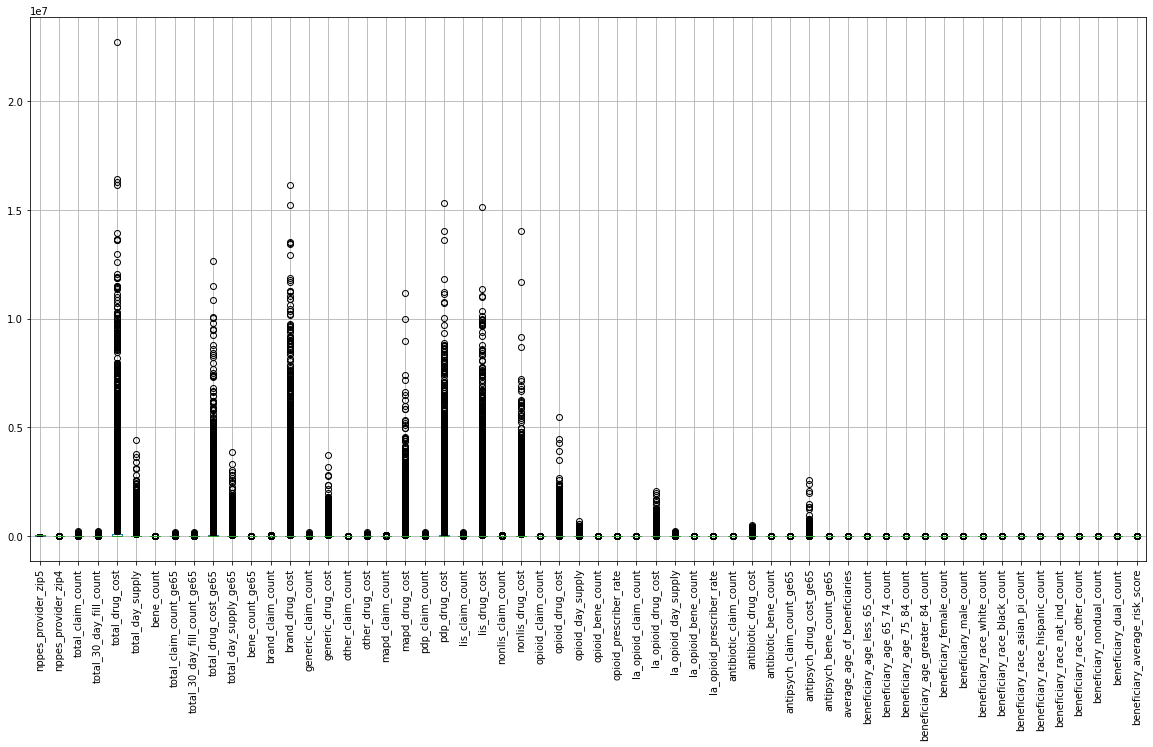

In [37]:
DataFrame_numerical.boxplot(figsize=(20,10), rot=90)

# Tukey (Detecting and Removing Outliers)
### The distribution’s inner fence is defined as 1.5 x IQR below Q1, and 1.5 x IQR above Q3. The outer fence is defined as 3 x IQR below Q1, and 3 x IQR above Q3. Following Tukey, only the probable outliers are treated, which lie outside the outer fence.

In [38]:
# First Way *

# from scipy import stats
# import numpy as np
# #Tukey's method
# def tukeys_method(DataFrame, variable):
#     #Takes two parameters: dataframe & variable of interest as string
#     q1 = DataFrame[variable].quantile(0.25)
#     q3 = DataFrame[variable].quantile(0.75)
#     iqr = q3-q1
#     inner_fence = 1.5*iqr
#     outer_fence = 3*iqr
    
#     #inner fence lower and upper end
#     inner_fence_le = q1-inner_fence
#     inner_fence_ue = q3+inner_fence
    
#     #outer fence lower and upper end
#     outer_fence_le = q1-outer_fence
#     outer_fence_ue = q3+outer_fence
    
#     outliers_prob = []
#     outliers_poss = []
#     for index, x in enumerate(DataFrame[variable]):
#         if x <= outer_fence_le or x >= outer_fence_ue:
#             outliers_prob.append(index)
#     for index, x in enumerate(DataFrame[variable]):
#         if x <= inner_fence_le or x >= inner_fence_ue:
#             outliers_poss.append(index)
#     return outliers_prob, outliers_poss

# for i in DataFrame.columns:
#     probable_outliers_tm, possible_outliers_tm = tukeys_method(DataFrame, i)
#     print(probable_outliers_tm)

In [39]:
# Second Way **

import pandas as pd
import numpy as np

def drop_outliers(DataFrame_numerical, field_name):
    distance = 1.5 * (np.nanpercentile(DataFrame_numerical[field_name], 95) - np.nanpercentile(DataFrame_numerical[field_name], 5))
    DataFrame_numerical.drop(DataFrame_numerical[DataFrame_numerical[field_name] > distance + np.nanpercentile(DataFrame_numerical[field_name], 95)].index, inplace=True)
    DataFrame_numerical.drop(DataFrame_numerical[DataFrame_numerical[field_name] < np.nanpercentile(DataFrame_numerical[field_name], 5) - distance].index, inplace=True)

if __name__ == "__main__":
      # assuming DataFrame_numerical exists and contains numeric variables

    before=DataFrame_numerical.shape

    for column in DataFrame_numerical.columns:
        drop_outliers(DataFrame_numerical, column)

    after=DataFrame_numerical.shape

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

In [40]:
print('DataFrame.shape before removing outliers :', before,
      '\nDataFrame.shape after removing outliers :',after,
      '\nAmount of Removed rows :', before[0]-after[0])

DataFrame.shape before removing outliers : (1014675, 58) 
DataFrame.shape after removing outliers : (718390, 58) 
Amount of Removed rows : 296285


In [41]:
DataFrame_numerical.head(3)

,nppes_provider_zip5,nppes_provider_zip4,total_claim_count,total_30_day_fill_count,total_drug_cost,total_day_supply,bene_count,total_claim_count_ge65,total_30_day_fill_count_ge65,total_drug_cost_ge65,total_day_supply_ge65,bene_count_ge65,brand_claim_count,brand_drug_cost,generic_claim_count,generic_drug_cost,other_claim_count,other_drug_cost,mapd_claim_count,mapd_drug_cost,pdp_claim_count,pdp_drug_cost,lis_claim_count,lis_drug_cost,nonlis_claim_count,nonlis_drug_cost,opioid_claim_count,opioid_drug_cost,opioid_day_supply,opioid_bene_count,opioid_prescriber_rate,la_opioid_claim_count,la_opioid_drug_cost,la_opioid_day_supply,la_opioid_bene_count,la_opioid_prescriber_rate,antibiotic_claim_count,antibiotic_drug_cost,antibiotic_bene_count,antipsych_claim_count_ge65,antipsych_drug_cost_ge65,antipsych_bene_count_ge65,average_age_of_beneficiaries,beneficiary_age_less_65_count,beneficiary_age_65_74_count,beneficiary_age_75_84_count,beneficiary_age_greater_84_count,beneficiary_female_count,beneficiary_male_count,beneficiary_race_white_count,beneficiary_race_black_count,beneficiary_race_asian_pi_count,beneficiary_race_hispanic_count,beneficiary_race_nat_ind_count,beneficiary_race_other_count,beneficiary_nondual_count,beneficiary_dual_count,beneficiary_average_risk_score
0,21502.0,1854.0,675,700.3,34683.66,15068,238.0,517.0,539.9,26897.150,11881.0,183.0,124.0,25445.55,538.0,8972.370,13.0,265.74,55.0,3960.66,620.0,30723.00,351.0,15295.86,324.0,19387.800,37.0,762.08,291.0,29.0,5.48,0.0,0.0,0.0,0.0,0.0,134.0,8050.71,114.0,0.0,0.0,0.0,71.0,55.0,84.0,68.0,31.0,134.0,104.0,227.0,0.0,0.0,0.0,0.0,0.0,144.0,94.0,2.0266
2,29405.0,3333.0,18,18.0,150.02,421,82.0,230.0,278.8,13305.705,6367.0,102.0,71.0,17913.89,316.0,7949.895,0.0,0.00,89.0,4578.96,208.0,12637.93,126.0,7813.95,165.0,8520.975,24.0,269.56,185.0,18.0,4.07,0.0,0.0,0.0,0.0,0.0,33.0,480.12,27.0,0.0,0.0,0.0,70.0,31.0,73.0,66.0,25.0,73.0,46.0,110.0,0.0,0.0,0.0,0.0,0.0,85.0,40.0,1.2276
3,89403.0,7482.0,58,58.7,395.17,693,26.0,37.0,37.7,259.720,571.0,102.0,0.0,0.00,41.0,261.490,17.0,133.68,20.0,103.08,38.0,292.09,14.0,78.46,44.0,316.710,18.0,80.40,39.0,11.0,31.03,0.0,0.0,0.0,0.0,0.0,19.0,114.38,16.0,0.0,0.0,0.0,67.0,31.0,73.0,66.0,25.0,73.0,46.0,110.0,0.0,0.0,0.0,0.0,0.0,85.0,40.0,1.3362


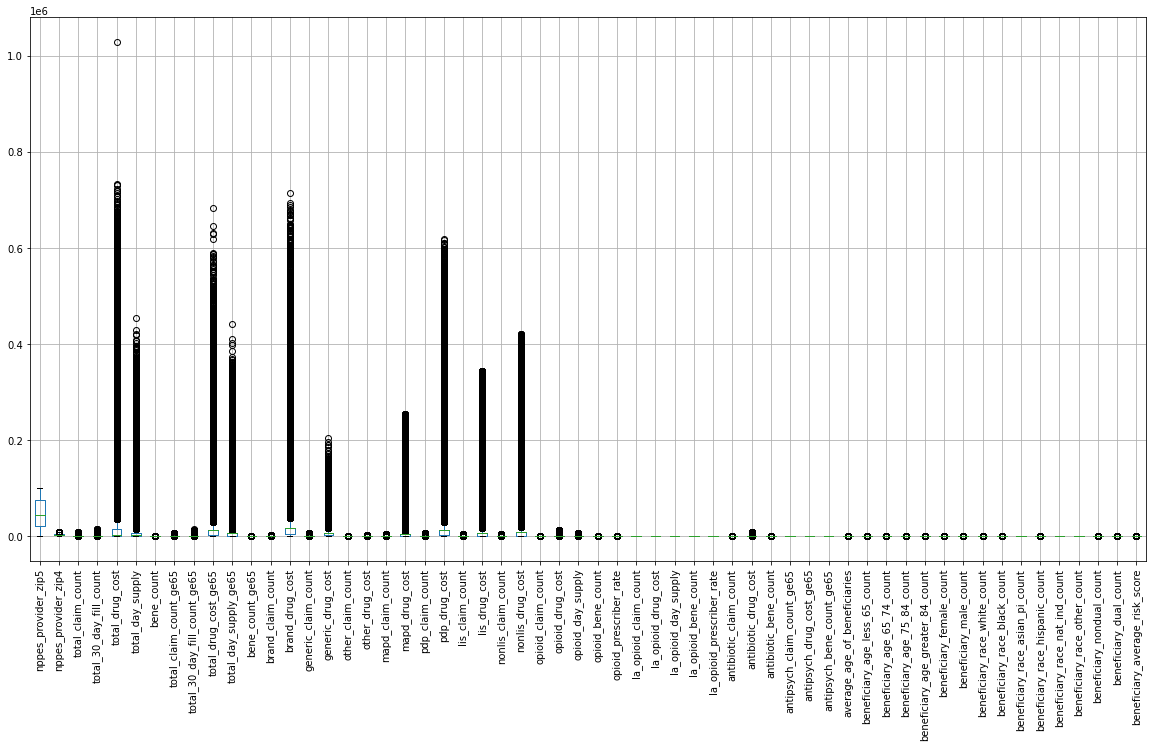

In [42]:
DataFrame_numerical.boxplot(figsize=(20,10), rot=90)

In [43]:
DataFrame.head()

,npi,nppes_credentials,nppes_provider_gender,nppes_entity_code,nppes_provider_street1,nppes_provider_street2,nppes_provider_city,nppes_provider_zip5,nppes_provider_zip4,nppes_provider_state,nppes_provider_country,specialty_description,description_flag,medicare_prvdr_enroll_status,total_claim_count,total_30_day_fill_count,total_drug_cost,total_day_supply,bene_count,total_claim_count_ge65,total_30_day_fill_count_ge65,total_drug_cost_ge65,total_day_supply_ge65,bene_count_ge65,brand_claim_count,brand_drug_cost,generic_claim_count,generic_drug_cost,other_claim_count,other_drug_cost,mapd_claim_count,mapd_drug_cost,pdp_claim_count,pdp_drug_cost,lis_claim_count,lis_drug_cost,nonlis_claim_count,nonlis_drug_cost,opioid_claim_count,opioid_drug_cost,opioid_day_supply,opioid_bene_count,opioid_prescriber_rate,la_opioid_claim_count,la_opioid_drug_cost,la_opioid_day_supply,la_opioid_bene_count,la_opioid_prescriber_rate,antibiotic_claim_count,antibiotic_drug_cost,antibiotic_bene_count,antipsych_claim_count_ge65,antipsych_drug_cost_ge65,antipsych_bene_count_ge65,average_age_of_beneficiaries,beneficiary_age_less_65_count,beneficiary_age_65_74_count,beneficiary_age_75_84_count,beneficiary_age_greater_84_count,beneficiary_female_count,beneficiary_male_count,beneficiary_race_white_count,beneficiary_race_black_count,beneficiary_race_asian_pi_count,beneficiary_race_hispanic_count,beneficiary_race_nat_ind_count,beneficiary_race_other_count,beneficiary_nondual_count,beneficiary_dual_count,beneficiary_average_risk_score
0,1003000126,M.D.,M,I,900 SETON DR,SUITE 100,CUMBERLAND,21502.0,1854.0,MD,US,Internal Medicine,S,E,675,700.3,34683.66,15068,238.0,517.0,539.9,26897.150,11881.0,183.0,124.0,25445.55,538.0,8972.370,13.0,265.74,55.0,3960.66,620.0,30723.00,351.0,15295.86,324.0,19387.800,37.0,762.08,291.0,29.0,5.48,0.0,0.00,0.0,0.0,0.00,134.0,8050.71,114.0,0.0,0.0,0.0,71.0,55.0,84.0,68.0,31.0,134.0,104.0,227.0,0.0,0.0,0.0,0.0,0.0,144.0,94.0,2.0266
1,1003000142,M.D.,M,I,4126 N HOLLAND SYLVANIA RD,SUITE 220,TOLEDO,43623.0,3536.0,OH,US,Anesthesiology,S,E,937,973.6,51586.70,27520,146.0,346.0,363.7,20778.740,10265.0,61.0,116.0,31794.97,821.0,19791.730,0.0,0.00,249.0,10542.82,688.0,41043.88,628.0,33275.89,309.0,18310.810,425.0,11469.70,11770.0,90.0,45.36,36.0,2534.43,979.0,0.0,8.47,33.0,480.12,27.0,0.0,0.0,0.0,61.0,85.0,41.0,66.0,25.0,81.0,65.0,95.0,0.0,0.0,0.0,0.0,0.0,64.0,82.0,1.6538
2,1003000159,FNP,F,I,4115 DORCHESTER ROAD,CONCENTRA MEDICAL CENTER,CHARLESTON,29405.0,3333.0,SC,US,Nurse Practitioner,S,E,18,18.0,150.02,421,82.0,230.0,278.8,13305.705,6367.0,102.0,71.0,17913.89,316.0,7949.895,0.0,0.00,89.0,4578.96,208.0,12637.93,126.0,7813.95,165.0,8520.975,24.0,269.56,185.0,18.0,4.07,0.0,0.00,0.0,0.0,0.00,33.0,480.12,27.0,0.0,0.0,0.0,70.0,31.0,73.0,66.0,25.0,73.0,46.0,110.0,0.0,0.0,0.0,0.0,0.0,85.0,40.0,1.2276
3,1003000167,DDS,M,I,5 PINE CONE RD,SUITE 100,DAYTON,89403.0,7482.0,NV,US,Dentist,T,N,58,58.7,395.17,693,26.0,37.0,37.7,259.720,571.0,102.0,0.0,0.00,41.0,261.490,17.0,133.68,20.0,103.08,38.0,292.09,14.0,78.46,44.0,316.710,18.0,80.40,39.0,11.0,31.03,0.0,0.00,0.0,0.0,0.00,19.0,114.38,16.0,0.0,0.0,0.0,67.0,31.0,73.0,66.0,25.0,73.0,46.0,110.0,0.0,0.0,0.0,0.0,0.0,85.0,40.0,1.3362
4,1003000282,FNP,F,I,TENNESSEE PRISON FOR WOMEN,3881 STEWARTS LANE,NASHVILLE,37243.0,1.0,TN,US,Nurse Practitioner,S,N,14,14.0,135.93,420,82.0,230.0,278.8,13305.705,6367.0,102.0,0.0,0.00,14.0,135.930,0.0,0.00,0.0,0.00,14.0,135.93,126.0,7813.95,165.0,8520.975,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,70.0,31.0,73.0,66.0,25.0,73.0,46.0,110.0,0.0,0.0,0.0,0.0,0.0,85.0,40.0,1.2276


### Find out how many are Individuals and how many are Organizations

In [44]:
DataFrame[['nppes_entity_code','npi']].groupby(['nppes_entity_code']).count()

,npi
nppes_entity_code,
I,1014653
O,22


### Find out maedicare providers specialty_description

In [45]:
DataFrame[['specialty_description', 'npi']].groupby(['specialty_description']).count()

,npi
specialty_description,
Acupuncturist,109
Addiction Medicine,161
Adult Companion,5
Advanced Practice Dental Therapist,1
Allergy/Immunology,3776
...,...
Unknown Supplier/Provider,19
Urology,10257
Vascular Surgery,2646


### Find out how many maedicare providers are male and how many of them are female

In [46]:
DataFrame[['nppes_provider_gender', 'npi']].groupby(['nppes_provider_gender']).count()

,npi
nppes_provider_gender,
F,396429
M,618246


### how many services in US and outside US

In [47]:
df_us=DataFrame[(DataFrame['nppes_provider_country']=='US')]
df_non_us=DataFrame[~(DataFrame['nppes_provider_country']=='US')]

In [48]:
print ('Number of Services offered in US - ',df_us['npi'].count())
print ('Number of Services offered outside US - ',df_non_us['npi'].count())

Number of Services offered in US -  1014675
Number of Services offered outside US -  0


### check the count of credentials

In [49]:
DataFrame['nppes_credentials'].value_counts()

M.D.                  323543
MD                    275734
DDS                    51072
D.O.                   34306
PA-C                   33876
                       ...  
M.S. NPP                   1
RNP-CNP                    1
NAVJOT                     1
NATALIE STRICKLAND         1
NP-C FAMILY                1
Name: nppes_credentials, Length: 5467, dtype: int64

In [50]:
(DataFrame[(DataFrame['nppes_provider_state']=='NC')])[['nppes_provider_city','nppes_provider_zip5','npi']].groupby(by=['nppes_provider_city','nppes_provider_zip5']).count()

,,npi
nppes_provider_city,nppes_provider_zip5,
ABERDEEN,28315.0,11
ADVANCE,27006.0,27
AHOSKIE,27910.0,57
ALAMANCE,27201.0,1
ALBEMARLE,28001.0,97
...,...,...
WOODLAND,27897.0,1
YADKINVILLE,27055.0,30
YANCEYVILLE,27379.0,22


In [51]:
(DataFrame[(DataFrame['nppes_provider_state']=='NC')])[['nppes_provider_city','nppes_provider_zip5','specialty_description','npi']].groupby(by=['nppes_provider_city','nppes_provider_zip5','specialty_description']).count()

npi
nppes_provider_city nppes_provider_zip5 specialty_description     
ABERDEEN            28315.0             Dentist                  4
                                        Family Practice          1
                                        General Practice         1
                                        Internal Medicine        1
                                        Nurse Practitioner       1
...                                                            ...
ZEBULON             27597.0             General Practice         2
                                        Internal Medicine        3
                                        Nurse Practitioner       2
                                        Optometry                1
                                        Physician Assistant      2

[5877 rows x 1 columns]

In [52]:
# where zipcode is 27614
(DataFrame[(DataFrame['nppes_provider_state']=='NC')
                    &(DataFrame['nppes_provider_zip5'] ==27614)])[['nppes_provider_city',
                                                                                      'nppes_provider_zip5',
                                                                                      'specialty_description',
                                                                                      'npi']
                                                                                    ].groupby(by=['nppes_provider_city',
                                                                                                  'nppes_provider_zip5',
                                                                                                  'specialty_description']).count()

npi
nppes_provider_city nppes_provider_zip5 specialty_description                    
RALEIGH             27614.0             Allergy/Immunology                      2
                                        Dentist                                 9
                                        Dermatology                             3
                                        Emergency Medicine                      4
                                        Endocrinology                           1
                                        Family Practice                        15
                                        Hematology/Oncology                     2
                                        Internal Medicine                       8
                                        Neuropsychiatry                         1
                                        Nurse Practitioner                      4
                                        Obstetrics/Gynecology                  12
                                        Optometry                               3
                                        Oral & Maxillofacial Surgery            1
                                        Oral Surgery (dentists only)            1
                                        Orthopedic Surgery                      1
                                        Otolaryngology                          2
                                        Pediatric Medicine                      1
                                        Pharmacist                              1
                                        Physical Medicine and Rehabilitation    2
                                        Physician Assistant                    20
                                        Plastic and Reconstructive Surgery      1
                                        Podiatry                                1
                                        Radiation Oncology                      1
                                        Specialist                              3
                                        Vascular Surgery                        2

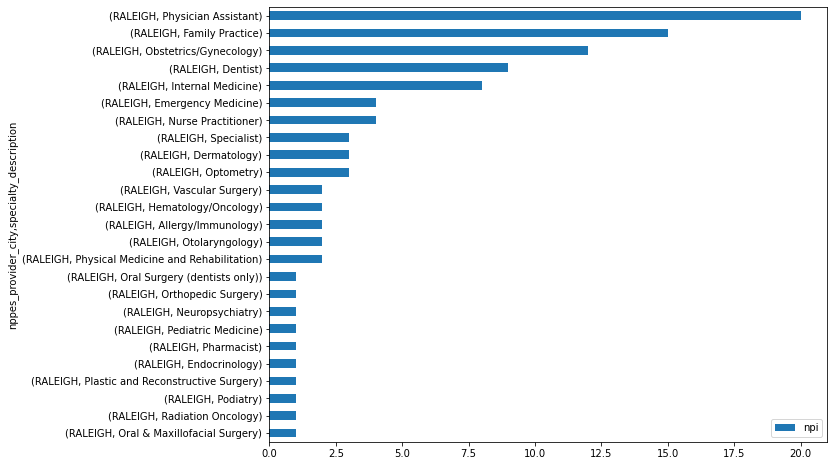

In [53]:
(DataFrame[(DataFrame['nppes_provider_state']=='NC')
                    &(DataFrame['nppes_provider_zip5'] ==27614)])[['nppes_provider_city',
                                                                                      'specialty_description',
                                                                                      'npi']
                                                                                    ].groupby(by=['nppes_provider_city',
                                                                                                  'specialty_description']).count().sort_values(by='npi', ascending=True).plot(kind='barh', figsize=(10,8))

## Adding Income column from the other dataset based on the Zipcodes

In [54]:
zpallagi=pd.read_csv("/content/drive/My Drive/Data Science/18zpallagi.csv")
zpallagi.head()

,STATEFIPS,STATE,zipcode,agi_stub,N1,mars1,MARS2,MARS4,ELF,CPREP,PREP,DIR_DEP,N2,NUMDEP,TOTAL_VITA,VITA,TCE,VITA_EIC,RAC,ELDERLY,A00100,N02650,A02650,N00200,A00200,N00300,A00300,N00600,A00600,N00650,A00650,N00700,A00700,N00900,A00900,N01000,A01000,N01750,A01750,SCHF,...,N07225,A07225,N07260,A07260,N09400,A09400,N85770,A85770,N85775,A85775,N09750,A09750,N10600,A10600,N59660,A59660,N59720,A59720,N11070,A11070,N10960,A10960,N11560,A11560,N06500,A06500,N10300,A10300,N85530,A85530,N85300,A85300,N11901,A11901,N11900,A11900,N11902,A11902,N12000,A12000
0,1,AL,0,1,768120.0,466830.0,90960.0,198750.0,696930.0,37470.0,399160.0,559820.0,1180240.0,439980.0,24700.0,16610.0,8100.0,5300.0,193550.0,146430.0,10119915.0,768120.0,10261015.0,611200.0,8093820.0,90050.0,58326.0,38280.0,64851.0,34310.0,42808.0,7120.0,3777.0,139800.0,722620.0,31400.0,41473.0,113700.0,1189581.0,7000.0,...,72640.0,25221709.0,470.0,442.0,109110.0,151679.0,49840.0,445567.0,52070.0,457574.0,8020.0,4656.0,705730.0,1956009.0,335090.0,1029252.0,309520.0,925357.0,206770.0,327356.0,46740.0,42649.0,19410.0,12495.0,192210.0,112117.0,298790.0,272245.0,0.0,0.0,0.0,0.0,59030.0,50007.0,669420.0,1732176.0,666750.0,1725286.0,2730.0,4220.0
1,1,AL,0,2,503430.0,225110.0,130060.0,134320.0,457510.0,23180.0,266880.0,371440.0,977450.0,348420.0,12230.0,8350.0,3880.0,350.0,124380.0,112920.0,18156451.0,503430.0,18322144.0,432240.0,14986384.0,91220.0,69033.0,37860.0,90397.0,34020.0,62140.0,35400.0,20927.0,68680.0,265689.0,30540.0,82058.0,110070.0,2117606.0,8690.0,...,183090.0,219324614.0,5260.0,7424.0,39300.0,92618.0,28510.0,243637.0,29770.0,258173.0,16630.0,11567.0,490520.0,1960001.0,143650.0,316107.0,129100.0,280354.0,128110.0,252063.0,28980.0,25862.0,6210.0,6244.0,351410.0,725087.0,376800.0,834109.0,0.0,0.0,0.0,0.0,77300.0,111047.0,424280.0,1230668.0,420960.0,1220934.0,4110.0,9399.0
2,1,AL,0,3,274590.0,95560.0,131770.0,41020.0,248630.0,13210.0,157800.0,179490.0,587740.0,182370.0,3110.0,1590.0,1520.0,0.0,45970.0,80580.0,16867358.0,274590.0,17015570.0,233850.0,12992584.0,84410.0,71942.0,38560.0,126299.0,34850.0,88256.0,49180.0,34350.0,43620.0,275245.0,32070.0,131901.0,82600.0,2245803.0,8180.0,...,102150.0,231949913.0,3210.0,7166.0,27890.0,73743.0,4730.0,43137.0,7240.0,64380.0,4060.0,4340.0,270000.0,1599388.0,530.0,209.0,190.0,77.0,25960.0,43983.0,15140.0,13663.0,170.0,228.0,245890.0,1091252.0,253380.0,1178827.0,0.0,0.0,0.0,0.0,68920.0,148870.0,205830.0,562490.0,201770.0,550675.0,5790.0,15182.0
3,1,AL,0,4,174830.0,35560.0,123370.0,12700.0,159190.0,6830.0,102340.0,110320.0,429360.0,131170.0,990.0,510.0,480.0,0.0,21650.0,56280.0,15167919.0,174830.0,15290801.0,149100.0,11296908.0,71280.0,70086.0,33940.0,135204.0,31030.0,96344.0,44170.0,36452.0,29770.0,253146.0,28280.0,167654.0,62150.0,2161441.0,5170.0,...,71880.0,196848024.0,940.0,2941.0,20370.0,59861.0,250.0,2151.0,1610.0,14360.0,910.0,1566.0,172760.0,1521941.0,0.0,0.0,0.0,0.0,2080.0,3373.0,10900.0,9731.0,0.0,0.0,170050.0,1176057.0,171510.0,1250551.0,0.0,0.0,0.0,0.0,47730.0,136776.0,126560.0,403410.0,122610.0,388967.0,3730.0,13784.0
4,1,AL,0,5,245150.0,25990.0,207950.0,6480.0,224280.0,10500.0,145010.0,123560.0,665630.0,213100.0,770.0,730.0,40.0,0.0,14670.0,80560.0,33353413.0,245150.0,33654113.0,214430.0,24346118.0,135520.0,185862.0,76710.0,454917.0,71470.0,344554.0,105380.0,116905.0,48760.0,728019.0,66780.0,729824.0,97010.0,4569064.0,9140.0,...,112700.0,315813960.0,130.0,355.0,33970.0,140181.0,0.0,0.0,380.0,3194.0,230.0,531.0,242910.0,3980479.0,0.0,0.0,0.0,0.0,20.0,46.0,18710.0,17235.0,0.0,0.0,243830.0,3655165.0,244190.0,3827935.0,550.0,161.0,50.0,58.0,98980.0,446992.0,145780.0,598498.0,137120.0,521691.0,9850.0,65917.0


In [55]:
uszips=pd.read_csv("/content/drive/My Drive/Data Science/uszips.csv")
# uszips.head()

In [56]:
zpallagi.rename(columns={'zipcode': 'nppes_provider_zip5'}, inplace=True)

In [57]:
Income= zpallagi.loc[:,['nppes_provider_zip5','A00100']]
DataFrame = pd.merge(DataFrame, Income)
DataFrame.head()

,npi,nppes_credentials,nppes_provider_gender,nppes_entity_code,nppes_provider_street1,nppes_provider_street2,nppes_provider_city,nppes_provider_zip5,nppes_provider_zip4,nppes_provider_state,nppes_provider_country,specialty_description,description_flag,medicare_prvdr_enroll_status,total_claim_count,total_30_day_fill_count,total_drug_cost,total_day_supply,bene_count,total_claim_count_ge65,total_30_day_fill_count_ge65,total_drug_cost_ge65,total_day_supply_ge65,bene_count_ge65,brand_claim_count,brand_drug_cost,generic_claim_count,generic_drug_cost,other_claim_count,other_drug_cost,mapd_claim_count,mapd_drug_cost,pdp_claim_count,pdp_drug_cost,lis_claim_count,lis_drug_cost,nonlis_claim_count,nonlis_drug_cost,opioid_claim_count,opioid_drug_cost,opioid_day_supply,opioid_bene_count,opioid_prescriber_rate,la_opioid_claim_count,la_opioid_drug_cost,la_opioid_day_supply,la_opioid_bene_count,la_opioid_prescriber_rate,antibiotic_claim_count,antibiotic_drug_cost,antibiotic_bene_count,antipsych_claim_count_ge65,antipsych_drug_cost_ge65,antipsych_bene_count_ge65,average_age_of_beneficiaries,beneficiary_age_less_65_count,beneficiary_age_65_74_count,beneficiary_age_75_84_count,beneficiary_age_greater_84_count,beneficiary_female_count,beneficiary_male_count,beneficiary_race_white_count,beneficiary_race_black_count,beneficiary_race_asian_pi_count,beneficiary_race_hispanic_count,beneficiary_race_nat_ind_count,beneficiary_race_other_count,beneficiary_nondual_count,beneficiary_dual_count,beneficiary_average_risk_score,A00100
0,1003000126,M.D.,M,I,900 SETON DR,SUITE 100,CUMBERLAND,21502.0,1854.0,MD,US,Internal Medicine,S,E,675,700.3,34683.66,15068,238.0,517.0,539.9,26897.15,11881.0,183.0,124.0,25445.55,538.0,8972.37,13.0,265.74,55.0,3960.66,620.0,30723.0,351.0,15295.86,324.0,19387.8,37.0,762.08,291.0,29.0,5.48,0.0,0.0,0.0,0.0,0.0,134.0,8050.71,114.0,0.0,0.0,0.0,71.0,55.0,84.0,68.0,31.0,134.0,104.0,227.0,0.0,0.0,0.0,0.0,0.0,144.0,94.0,2.0266,84343.0
1,1003000126,M.D.,M,I,900 SETON DR,SUITE 100,CUMBERLAND,21502.0,1854.0,MD,US,Internal Medicine,S,E,675,700.3,34683.66,15068,238.0,517.0,539.9,26897.15,11881.0,183.0,124.0,25445.55,538.0,8972.37,13.0,265.74,55.0,3960.66,620.0,30723.0,351.0,15295.86,324.0,19387.8,37.0,762.08,291.0,29.0,5.48,0.0,0.0,0.0,0.0,0.0,134.0,8050.71,114.0,0.0,0.0,0.0,71.0,55.0,84.0,68.0,31.0,134.0,104.0,227.0,0.0,0.0,0.0,0.0,0.0,144.0,94.0,2.0266,148508.0
2,1003000126,M.D.,M,I,900 SETON DR,SUITE 100,CUMBERLAND,21502.0,1854.0,MD,US,Internal Medicine,S,E,675,700.3,34683.66,15068,238.0,517.0,539.9,26897.15,11881.0,183.0,124.0,25445.55,538.0,8972.37,13.0,265.74,55.0,3960.66,620.0,30723.0,351.0,15295.86,324.0,19387.8,37.0,762.08,291.0,29.0,5.48,0.0,0.0,0.0,0.0,0.0,134.0,8050.71,114.0,0.0,0.0,0.0,71.0,55.0,84.0,68.0,31.0,134.0,104.0,227.0,0.0,0.0,0.0,0.0,0.0,144.0,94.0,2.0266,146589.0
3,1003000126,M.D.,M,I,900 SETON DR,SUITE 100,CUMBERLAND,21502.0,1854.0,MD,US,Internal Medicine,S,E,675,700.3,34683.66,15068,238.0,517.0,539.9,26897.15,11881.0,183.0,124.0,25445.55,538.0,8972.37,13.0,265.74,55.0,3960.66,620.0,30723.0,351.0,15295.86,324.0,19387.8,37.0,762.08,291.0,29.0,5.48,0.0,0.0,0.0,0.0,0.0,134.0,8050.71,114.0,0.0,0.0,0.0,71.0,55.0,84.0,68.0,31.0,134.0,104.0,227.0,0.0,0.0,0.0,0.0,0.0,144.0,94.0,2.0266,124089.0
4,1003000126,M.D.,M,I,900 SETON DR,SUITE 100,CUMBERLAND,21502.0,1854.0,MD,US,Internal Medicine,S,E,675,700.3,34683.66,15068,238.0,517.0,539.9,26897.15,11881.0,183.0,124.0,25445.55,538.0,8972.37,13.0,265.74,55.0,3960.66,620.0,30723.0,351.0,15295.86,324.0,19387.8,37.0,762.08,291.0,29.0,5.48,0.0,0.0,0.0,0.0,0.0,134.0,8050.71,114.0,0.0,0.0,0.0,71.0,55.0,84.0,68.0,31.0,134.0,104.0,227.0,0.0,0.0,0.0,0.0,0.0,144.0,94.0,2.0266,207009.0
